# ドル円 為替レート 15分足

### 一つ上のディレクトリをパスに追加

In [19]:
import sys
path_up = '..'
if not path_up in sys.path:
    sys.path.append(path_up)

### ライブラリをここで一括インポート

In [20]:
import datetime

import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import mplfinance as mpf
import numpy as np
import pandas as pd
import yfinance as yf

from funcs.common import get_name_15min_chart, get_name_15min_chart_now

## yfinance による株価データの取得

In [21]:
code = "USDJPY=X"
symbol = code
ticker = yf.Ticker(symbol)
# 長めにデータを取得しておく
df = ticker.history(period='2d', interval='15m')
# タイムゾーンを日本時間に変換
df.index = df.index.tz_convert('Asia/Tokyo')
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2025-06-03 08:00:00+09:00,142.526993,142.531006,142.490997,142.496994,0,0.0,0.0
2025-06-03 08:15:00+09:00,142.496994,142.591003,142.475998,142.514008,0,0.0,0.0
2025-06-03 08:30:00+09:00,142.509995,142.535004,142.371994,142.412003,0,0.0,0.0
2025-06-03 08:45:00+09:00,142.416000,142.475006,142.401993,142.423996,0,0.0,0.0
2025-06-03 09:00:00+09:00,142.425995,142.688004,142.417999,142.658005,0,0.0,0.0
...,...,...,...,...,...,...,...
2025-06-04 08:30:00+09:00,143.987000,143.990005,143.880997,143.891998,0,0.0,0.0
2025-06-04 08:45:00+09:00,143.893005,143.895004,143.794998,143.817993,0,0.0,0.0
2025-06-04 09:00:00+09:00,143.815994,144.014008,143.796005,143.919998,0,0.0,0.0


## 時間帯を固定

In [22]:
# 現在時刻から、本日の日付を使用する
dt = datetime.datetime.now()
# ザラ場の取引時間に固定する
dt_start = pd.to_datetime(f"{dt.year}-{dt.month}-{dt.day} 09:00:00+09:00")
dt_end = pd.to_datetime(f"{dt.year}-{dt.month}-{dt.day} 15:30:00+09:00")
df0 = df[(dt_start <= df.index) & (df.index <= dt_end)]
dt_first = df0.index[0]
df0

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2025-06-04 09:00:00+09:00,143.815994,144.014008,143.796005,143.919998,0,0.0,0.0
2025-06-04 09:15:00+09:00,143.923004,143.942001,143.770996,143.893005,0,0.0,0.0
2025-06-04 09:30:00+09:00,143.893005,143.960007,143.854004,143.867004,0,0.0,0.0


## ローソク足チャート（小さいサイズ）

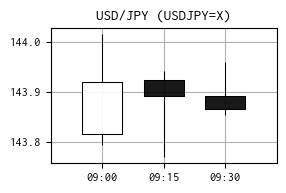

In [23]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = 9

fig, ax = plt.subplots(figsize=(3, 2))
mpf.plot(
    df0,
    type='candle',
    style='default',
    datetime_format='%H:%M',
    xrotation=0,
    update_width_config=dict(candle_linewidth=0.75),
    ax=ax,
)
ax.set_ylabel(None)
ax.grid()

if "shortName" in ticker.info:
    ax.set_title(f"{ticker.info['shortName']} ({symbol})")
elif "longName" in ticker.info:
    ax.set_title(f"{ticker.info['longName']} ({symbol})")
else:
    ax.set_title(f"{symbol}")
    
plt.tight_layout()
plt.savefig(get_name_15min_chart(code, dt_first))
plt.show()